In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,recall_score, precision_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("Prva_zadaca.csv")
print(df.head())

   Unnamed: 0   Merenje 1   Merenje 2  Primil lek ili ne
0           0  151.354987  128.022177                  1
1           1  140.893229  142.951676                  0
2           2  149.398011  123.352114                  1
3           3  145.447638  144.392613                  0
4           4  146.130695  111.255393                  1


In [3]:
print(df['Merenje 1'].info())
print('---------------------------------------------')
print(df['Merenje 1'].value_counts())
print('---------------------------------------------------')
print(df['Merenje 2'].info())
print('---------------------------------------------')
print(df['Merenje 2'].value_counts())
print('---------------------------------------------------')
print(df['Primil lek ili ne'].info())
print('---------------------------------------------')
print(df['Primil lek ili ne'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Merenje 1
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes
None
---------------------------------------------
151.354987    1
164.282201    1
153.475007    1
165.503945    1
145.437615    1
             ..
160.323108    1
137.523567    1
158.034882    1
161.649648    1
156.946521    1
Name: Merenje 1, Length: 100, dtype: int64
---------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Merenje 2
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes
None
---------------------------------------------
128.022177    1
163.684934    1
120.356546    1
162.401022    1
108.118004    1
             ..
133.277275    1
132.270239    1
85.872594     1
164.380749    1
104.003785    1
Name: Merenje 2, Length: 100, dty

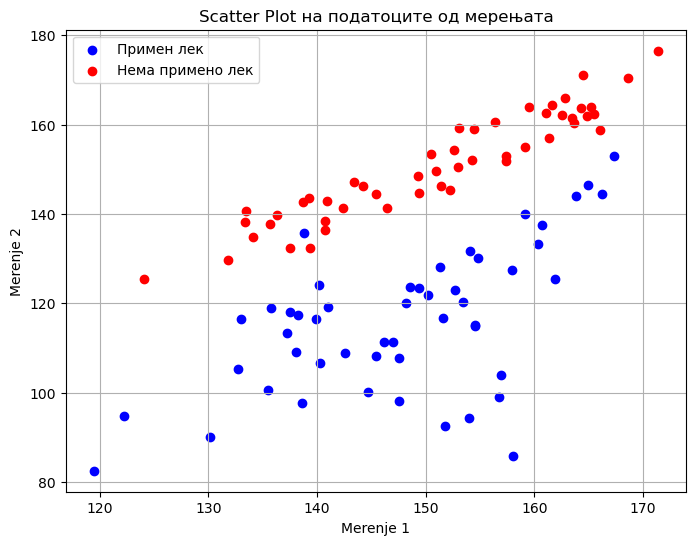

In [4]:
# Подели ги податоците во две групи според тоа дали пациентот примил лек или не
medication_received = df[df['Primil lek ili ne'] == 1]
medication_not_received = df[df['Primil lek ili ne'] == 0]

# Направи scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(medication_received['Merenje 1'], medication_received['Merenje 2'], c='blue', label='Примен лек')
plt.scatter(medication_not_received['Merenje 1'], medication_not_received['Merenje 2'], c='red', label='Нема примено лек')
plt.xlabel('Merenje 1')
plt.ylabel('Merenje 2')
plt.title('Scatter Plot на податоците од мерењата')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Пресметај ја промената во крвниот притисок за секој пациент
df['Change in Blood Pressure'] = df['Merenje 1'] - df['Merenje 2']

# Категоризирај 'Change in Blood Pressure' варијабла базирано на промена на вредноста
def categorize_change(amount):
    if amount < 0:
        return 'Намалено'
    elif amount == 0:
        return 'Нема промена'
    else:
        return 'Зголемено'

df['Change Category'] = df['Change in Blood Pressure'].apply(categorize_change)

# Дескриптивна статистика за 'Change in Blood Pressure' варијаблата
descriptive_stats = df['Change in Blood Pressure'].describe()

print("Дескриптивна статистика за 'Промена во крвниот притисок':")
print(descriptive_stats)

# Изброј за секоја категорија од 'Change Category'
category_counts = df['Change Category'].value_counts()

print("\nПромени:")
print(category_counts)


Дескриптивна статистика за 'Промена во крвниот притисок':
count    100.000000
mean      15.848629
std       18.485553
min       -7.175558
25%        0.757707
50%        7.175732
75%       28.453727
max       72.162288
Name: Change in Blood Pressure, dtype: float64

Промени:
Зголемено    77
Намалено     23
Name: Change Category, dtype: int64


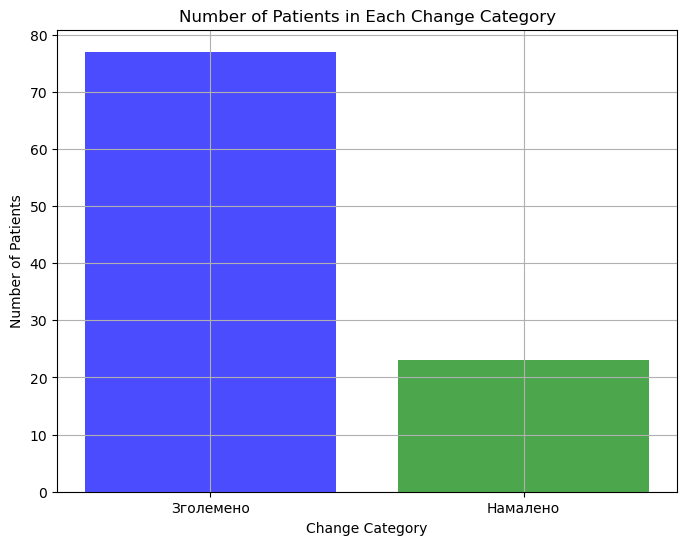

In [6]:
# Креирај a bar plot за пациентите по категории
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color=['blue', 'green', 'orange'], alpha=0.7)
plt.xlabel('Change Category')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Change Category')
plt.grid(True)
plt.show()

In [7]:
# paired t-test
t_statistic, p_value = ttest_rel(df['Merenje 2'], df['Merenje 1'])

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Има значајни промени во крвниот притисок измерен првиот ден и после шест месеци.")
else:
    print("Нема значајни промени во крвниот притисок измерен првиот ден и после шест месеци.")


t-statistic: -8.573521423604843
p-value: 1.395979462898813e-13
Има значајни промени во крвниот притисок измерен првиот ден и после шест месеци.


In [8]:
# Филтрирај ги податоците за пациенти кои примиле лек (Primil lek ili ne = 1)
medication_received_data = df[df['Primil lek ili ne'] == 1]

# paired t-test
t_statistic, p_value = ttest_rel(medication_received_data['Merenje 2'], medication_received_data['Merenje 1'])

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Има значајни промени во крвниот притисок кај пациентите кои примиле лек.")
    if t_statistic < 0:
        print("Крвниот притисок значајно се намалил.")
    else:
        print("Крвниот притисок значајно се зголемил.")
else:
    print("Нема значајни промени во крвниот притисок кај пациенти кои примиле лек.")


t-statistic: -16.795450944241082
p-value: 5.743211442093318e-22
Има значајни промени во крвниот притисок кај пациентите кои примиле лек.
Крвниот притисок значајно се намалил.


In [9]:
# Филтрирај ги податоците за пациенти кои не примиле лек (Primil lek ili ne = 0)
medication_not_received_data = df[df['Primil lek ili ne'] == 0]

# paired t-test
statistic, p_value = ttest_rel(medication_not_received_data['Merenje 2'], medication_not_received_data['Merenje 1'])

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Има значајни промени во крвниот притисок кај пациентите кои  не примиле лек.")
    if t_statistic < 0:
        print("Крвниот притисок значајно се намалил.")
    else:
        print("Крвниот притисок значајно се зголемил.")
else:
    print("Нема значајни промени во крвниот притисок кај пациенти кои не примиле лек.")

t-statistic: -16.795450944241082
p-value: 0.7067641552858971
Нема значајни промени во крвниот притисок кај пациенти кои не примиле лек.


In [10]:
# Разлика меѓу пациенти кои примиле и не примиле лек
statistic, p_value = ttest_rel(medication_received_data['Merenje 2'], medication_not_received_data['Merenje 1'])

print("Test statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Има значајна разлика на крвниот притисок меѓу пациенти кои примиле лек и пациенти кои не примиле лек.")
else:
    print("Нема значајна разлика на крвниот притисок меѓу пациенти кои примиле лек и пациенти кои не примиле лек.")


Test statistic: -11.68628389970976
p-value: 8.90440840946684e-16
Има значајна разлика на крвниот притисок меѓу пациенти кои примиле лек и пациенти кои не примиле лек.


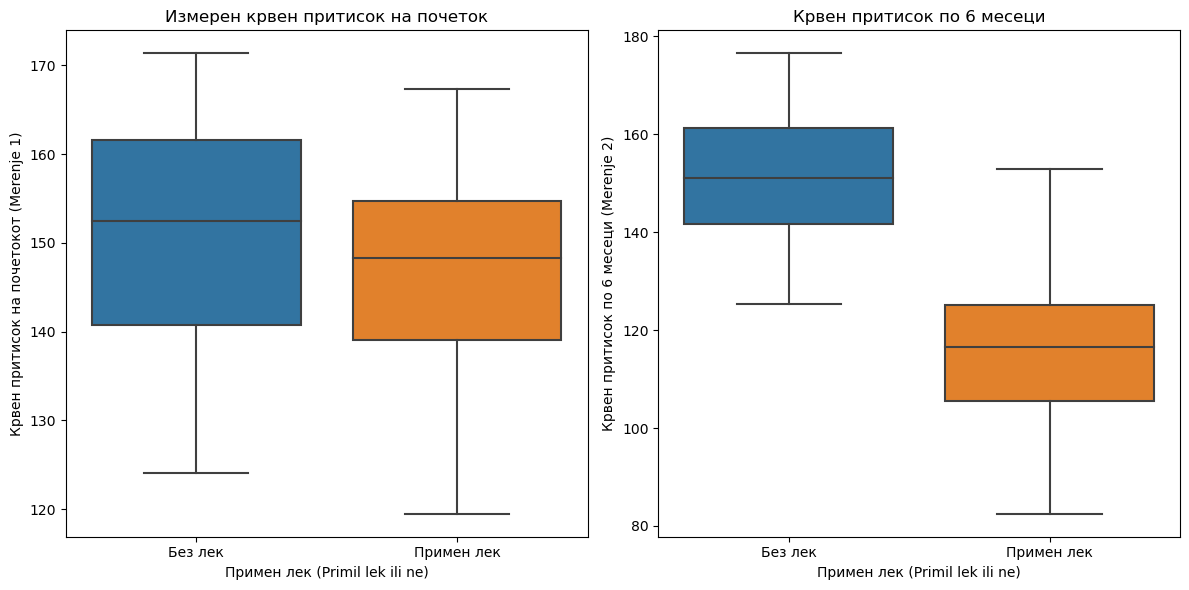

In [11]:
# Креирај comparison plots за крвниот притисок на првото мерење (Merenje 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Primil lek ili ne', y='Merenje 1', data=df)
plt.xlabel('Примен лек (Primil lek ili ne)')
plt.ylabel('Крвен притисок на почетокот (Merenje 1)')
plt.title('Измерен крвен притисок на почеток')
plt.xticks([0, 1], ['Без лек', 'Примен лек'])

# Креирај comparison plots за крвниот притисок на мерењето по 6 месеци (Merenje 2)
plt.subplot(1, 2, 2)
sns.boxplot(x='Primil lek ili ne', y='Merenje 2', data=df)
plt.xlabel('Примен лек (Primil lek ili ne)')
plt.ylabel('Крвен притисок по 6 месеци (Merenje 2)')
plt.title('Крвен притисок по 6 месеци')
plt.xticks([0, 1], ['Без лек', 'Примен лек'])

plt.tight_layout()
plt.show()


### Втора задача


Training Accuracy: 0.5375
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.53      0.46      0.49        39
           1       0.54      0.61      0.57        41

    accuracy                           0.54        80
   macro avg       0.54      0.54      0.53        80
weighted avg       0.54      0.54      0.53        80

Confusion Matrix (Training Set):
 [[18 21]
 [16 25]]

Testing Accuracy: 0.55
Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.50      0.78      0.61         9

    accuracy                           0.55        20
   macro avg       0.58      0.57      0.54        20
weighted avg       0.59      0.55      0.53        20

Confusion Matrix (Testing Set):
 [[4 7]
 [2 7]]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


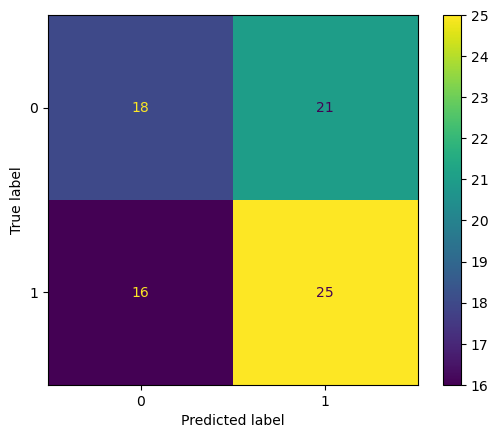

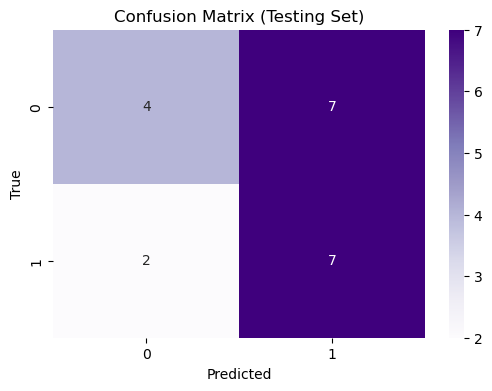

In [12]:
# Вчитај ги податоците
df = pd.read_csv("Prva_zadaca.csv")

# Категоризирај ги пациентите во две групи: 0 (не примиле лек) и 1 (примиле лек)
df['Grupa'] = df['Primil lek ili ne']

# Раздели на карактеристики (X) и таргет (y)
X = df[['Merenje 1']]
y = df['Grupa']

# Подели ги податоците на тест и тренинг сетови 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Креирај и истренириј го моделот (logistic regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Предвидувања на тренинг сетот
y_train_pred = model.predict(X_train)

# Евалуација
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Classification Report (Training Set):\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model, X_train, y_train)


# Предвидувања на тест сетот
y_test_pred = model.predict(X_test)

# Евалуација
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTesting Accuracy:", test_accuracy)
print("Classification Report (Testing Set):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Testing Set):\n", confusion_matrix(y_test, y_test_pred))

conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Set)')
plt.show()


In [13]:
#Podatocite se podelen vo trening i test setovi vo soodnos 80% so 20%. 
# Predviduvanje na modelot vo koj shto e vkluchen samo "Merenje 1" vo kombinacija so kolonata "Primil lek ili ne" e najslabo od prichina shto brojkite vo np array vo kolonata
# "Merenje 1" se bliski i ispituvanjeto se pravi vo momentot koga se ushte nikoj od pacientite ne zemal od lekot. Algoritamot
# ne prepoznava logika i pravi mnogu greski.

Training Accuracy for Merenje 2: 0.875
Classification Report (Training Set) for Merenje 2:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.90      0.85      0.88        41

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80

Confusion Matrix (Training Set) for Merenje 2:
 [[35  4]
 [ 6 35]]

Testing Accuracy for Merenje 2: 0.9
Classification Report (Testing Set) for Merenje 2:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion Matrix (Testing Set) for Merenje 2:
 [[10  1]
 [ 1  8]]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


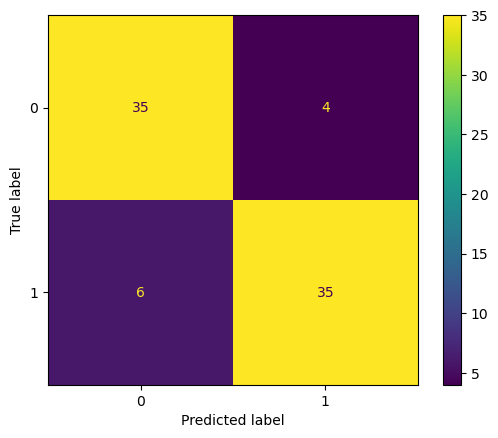

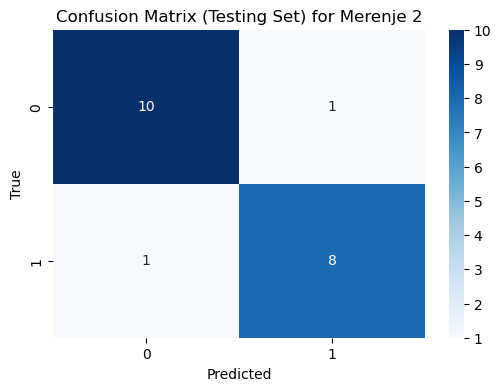

In [14]:

X_merenje2 = df[['Merenje 2']]
y_merenje2 = df['Grupa']

# Подели ги податоците на тест и тренинг сетови за 'Merenje 2'
X_train_merenje2, X_test_merenje2, y_train_merenje2, y_test_merenje2 = train_test_split(X_merenje2, y_merenje2, test_size=0.2, random_state=1234)

# Креирај и истренирај го моделот за 'Merenje 2'
model_merenje2 = LogisticRegression()
model_merenje2.fit(X_train_merenje2, y_train_merenje2)

# Предвидувања на моделот за 'Merenje 2'
y_train_pred_merenje2 = model_merenje2.predict(X_train_merenje2)

# Евалуација на моделот за 'Merenje 2'
train_accuracy_merenje2 = accuracy_score(y_train_merenje2, y_train_pred_merenje2)
print("Training Accuracy for Merenje 2:", train_accuracy_merenje2)
print("Classification Report (Training Set) for Merenje 2:\n", classification_report(y_train_merenje2, y_train_pred_merenje2))
print("Confusion Matrix (Training Set) for Merenje 2:\n", confusion_matrix(y_train_merenje2, y_train_pred_merenje2))
plot_confusion_matrix(model_merenje2, X_train_merenje2, y_train_merenje2)


# Предвидувања на тест сетот за 'Merenje 2'
y_test_pred_merenje2 = model_merenje2.predict(X_test_merenje2)

# Евалуација за 'Merenje 2'
test_accuracy_merenje2 = accuracy_score(y_test_merenje2, y_test_pred_merenje2)
print("\nTesting Accuracy for Merenje 2:", test_accuracy_merenje2)
print("Classification Report (Testing Set) for Merenje 2:\n", classification_report(y_test_merenje2, y_test_pred_merenje2))
print("Confusion Matrix (Testing Set) for Merenje 2:\n", confusion_matrix(y_test_merenje2, y_test_pred_merenje2))

conf_mat_merenje2 = confusion_matrix(y_test_merenje2, y_test_pred_merenje2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_merenje2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Set) for Merenje 2')
plt.show()



In [15]:

# Predviduvanje na modelot vo koj shto e vkluchen samo "Merenje 2" e mnogu podobar od modelot so "Merenje 1". Modelot 
# vekje  prepoznava nekoja logika i golema razlika pomegju brojkite vo np array vo kombinacija so kolonata kade sto se "0" i "1" olonata
# Toa e zatoa sto del od pacientite zemale lek i ima razlika vo krvniot pritisok kaj niv vo sporedba so pacientite 
#sto ne zemale lek 

Training Accuracy: 0.9875
Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.98      0.99        41

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix (Training Set):
 [[39  0]
 [ 1 40]]
Evaluating the model on the TEST data :
Accuracy:  1.0


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


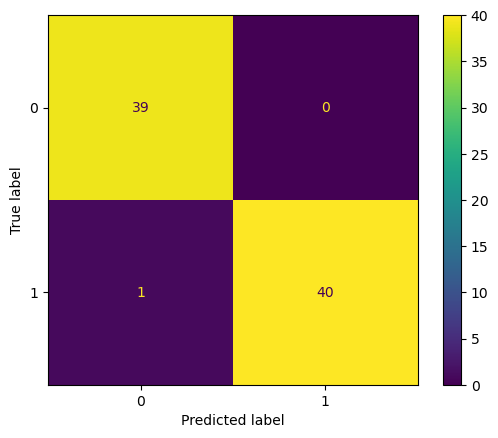

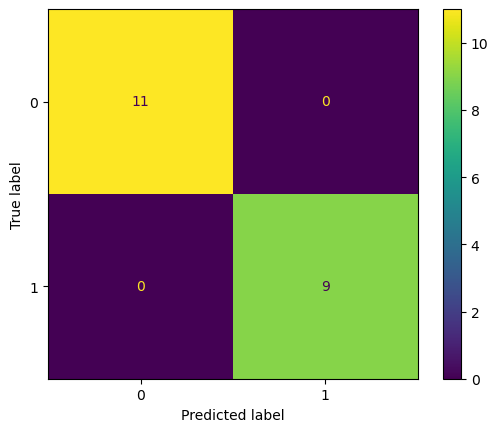

In [16]:
# # Раздели на карактеристики (X) и таргет (y) за 'Merenje 1' и 'Merenje 2'
X = df[['Merenje 1', 'Merenje 2']]
y = df['Grupa']

# Подели ги податоците на тест и тренинг сетови 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Креирај и истренирај го моделот за 'Merenje 1' и 'Merenje 2'
model_train = LogisticRegression()
model_train.fit(X_train, y_train)

# Предвидувања 
y_train_pred = model_train.predict(X_train)

# Евалуација
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Classification Report (Training Set):\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model_train, X_train, y_train)

# Креирај модел за 'Merenje 1' и 'Merenje 2'
model_test = LogisticRegression()
model_test.fit(X_test, y_test)

y_pred2 = model_test.predict(X_test)
print('Evaluating the model on the TEST data :')
plot_confusion_matrix(model_test, X_test, y_test)
print('Accuracy: ', model_test.score(X_test, y_test))


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


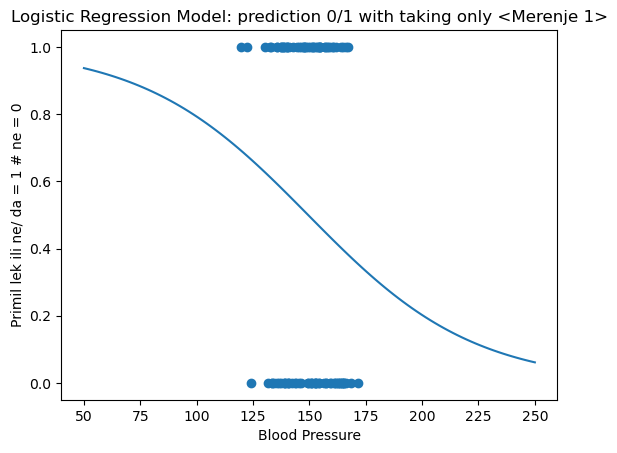

In [17]:
# Градење модел базиран на 'Merenje 1'
X = df[['Merenje 1']].to_numpy().reshape(-1, 1)
y = df[['Primil lek ili ne']].to_numpy()


model_m1 = LogisticRegression()
model_m1.fit(X, y)

xs = np.linspace(50, 250, 100).reshape(-1, 1)
ys_m1 = model_m1.predict_proba(xs)

plt.figure()
plt.scatter(X, y)
plt.plot(xs, ys_m1[:, 1])
plt.xlabel('Blood Pressure')
plt.ylabel('Primil lek ili ne/ da = 1 # ne = 0')
plt.title('Logistic Regression Model: prediction 0/1 with taking only <Merenje 1>')
plt.show()

In [18]:
# Na grafikonot "Merenje 1" se gleda deka kosinata na linijata za odluchuvanje dali e "1" ili "0" ne e dovolno strmna 
# i ostava shirok dijapazon za greski

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


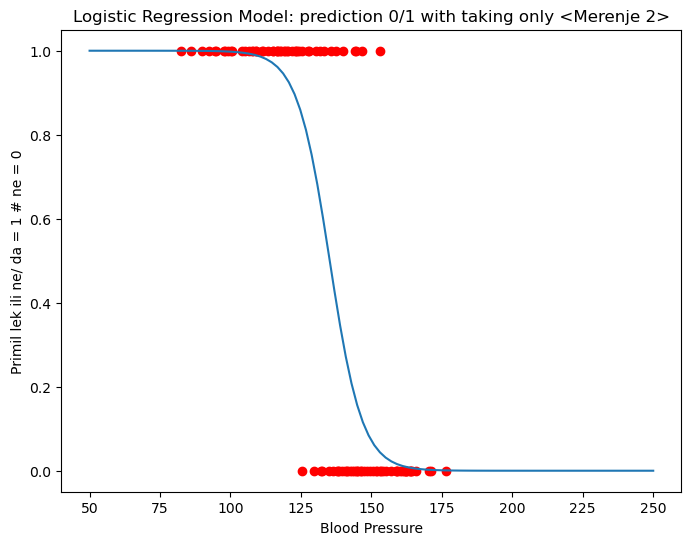

In [19]:
# Градење модел базиран на 'Merenje 2'
X = df[['Merenje 2']].to_numpy().reshape(-1, 1)
y = df[['Primil lek ili ne']].to_numpy()

model_m2 = LogisticRegression()
model_m2.fit(X, y)


xs = np.linspace(50, 250, 100).reshape(-1, 1)
ys_m2 = model_m2.predict_proba(xs)

plt.figure(figsize=(8, 6))

plt.scatter(X, y, c = 'r', label='primen lek')
plt.plot(xs, ys_m2[:, 1])
plt.xlabel('Blood Pressure')
plt.ylabel('Primil lek ili ne/ da = 1 # ne = 0')
plt.title('Logistic Regression Model: prediction 0/1 with taking only <Merenje 2>')
plt.show()



In [20]:
# Na grafikonot "Merenje 2"  kosinata na linijata za odluchuvanje dali e "1" ili "0" e strmna 
# i go namaluva dijapazonot za greski

In [21]:
df2 = pd.read_csv("Vtora_zadaca.csv")
print(df2)


    Unnamed: 0   Merenje 1   Merenje 2
0            0  163.419762  156.977602
1            1  154.133336  127.545654
2            2  144.966965  144.371136
3            3  150.545838  150.807626
4            4  153.743813  148.645986
..         ...         ...         ...
95          95  153.006514  151.003056
96          96  143.406574  150.709426
97          97  151.069090  139.754312
98          98  140.135277  144.363428
99          99  154.120504  149.699120

[100 rows x 3 columns]


In [22]:
model_class = LogisticRegression()
model_class.fit(X,y)

y_pred = model_class.predict(X)
y_prob = model_class.predict_proba(X)

df['predicted class'] = y_pred
df['predicted probability'] = y_prob[:, 1]
display(df)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne,Grupa,predicted class,predicted probability
0,0,151.354987,128.022177,1,1,1,0.776319
1,1,140.893229,142.951676,0,0,0,0.207540
2,2,149.398011,123.352114,1,1,1,0.886219
3,3,145.447638,144.392613,0,0,0,0.169492
4,4,146.130695,111.255393,1,1,1,0.984427
...,...,...,...,...,...,...,...
95,95,171.349918,176.539961,0,0,0,0.000781
96,96,137.475245,117.997604,1,1,1,0.951640
97,97,162.832752,165.922771,0,0,0,0.004889
98,98,138.662686,97.664238,1,1,1,0.998497


Evaluating the model on the TRAIN data (not appropriate):
Accuracy:  0.99


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


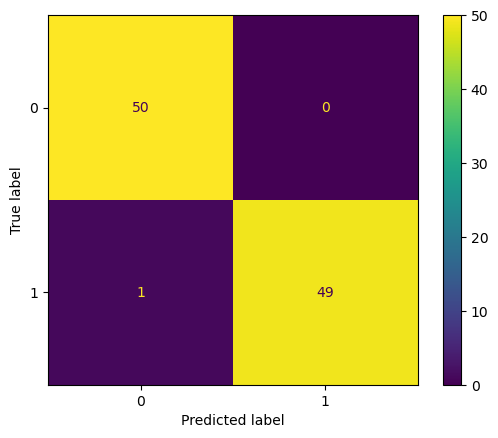

In [23]:
# Градење модел базиран на 'Merenje 1' и 'Merenje 2'
X_m12 = df[['Merenje 1', 'Merenje 2']].to_numpy()


model_m12 = LogisticRegression()
model_m12.fit(X_m12, y)


y_pred = model_m12.predict(X_m12)
print('Evaluating the model on the TRAIN data (not appropriate):')
plot_confusion_matrix(model_m12, X_m12, y)
print('Accuracy: ', model_m12.score(X_m12, y))


In [25]:
# Predviduvanje na modelot vo koj shto se vkluchen "Merenje 1" i 'Merenje 2' e najdobar. Toa e zatoa sto modelot ima kompletna 
#slika i algoritamot vo potpolnost ili 99% ja prepoznava logikata 

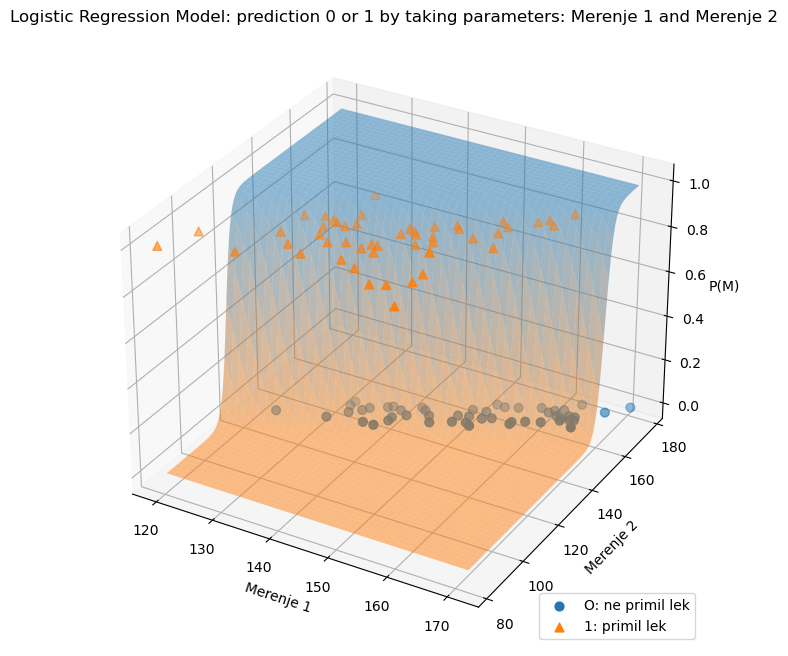

In [26]:
# Подели ги податоците за пациентите кои што не примиле лек (0)
xm = df.loc[df['Primil lek ili ne'] == 0]['Merenje 1']
ym = df.loc[df['Primil lek ili ne'] == 0]['Merenje 2']
zm = df.loc[df['Primil lek ili ne'] == 0]['Primil lek ili ne']

# Подели ги податоците за пациентите кои што примиле лек (1)
xf = df.loc[df['Primil lek ili ne'] == 1]['Merenje 1']
yf = df.loc[df['Primil lek ili ne'] == 1]['Merenje 2']
zf = df.loc[df['Primil lek ili ne'] == 1]['Primil lek ili ne']

# Creating the surface for the model
xs = np.linspace(X_m12[:,0].min(), X_m12[:,0].max(), 1000)
ys = np.linspace(X_m12[:,1].min(), X_m12[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model_m12.intercept_[0]
b_h = model_m12.coef_[0][0]
b_w = model_m12.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_h*xs + b_w*ys))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:orange', 'tab:blue'])

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(xm, ym, zm, marker='o', s=40, label = 'O: ne primil lek')
ax2.scatter(xf, yf, zf, marker='^', s=40, label = '1: primil lek')
ax2.set_xlabel('Merenje 1')
ax2.set_ylabel('Merenje 2')
ax2.set_zlabel('P(M)')
ax2.legend(loc='lower right')
plt.title('Logistic Regression Model: prediction 0 or 1 by taking parameters: Merenje 1 and Merenje 2')
plt.show()


In [27]:
# Na 3D grafikonot kade sto e vklucheno "Merenje 1" i "Merenje 2" kosinata na linijata za odluchuvanje dali e "1" ili "0" e 
# najstrmna i greskite se najmali


In [28]:
#Bonus

X = df['Merenje 1'].to_numpy().reshape(-1, 1)
y = df['Primil lek ili ne'].to_numpy()

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

df['predicted 1 or 0'] = y_pred

display(df)

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne,Grupa,predicted class,predicted probability,predicted 1 or 0
0,0,151.354987,128.022177,1,1,1,0.776319,0.486858
1,1,140.893229,142.951676,0,0,0,0.207540,0.556578
2,2,149.398011,123.352114,1,1,1,0.886219,0.499900
3,3,145.447638,144.392613,0,0,0,0.169492,0.526227
4,4,146.130695,111.255393,1,1,1,0.984427,0.521675
...,...,...,...,...,...,...,...,...
95,95,171.349918,176.539961,0,0,0,0.000781,0.353607
96,96,137.475245,117.997604,1,1,1,0.951640,0.579357
97,97,162.832752,165.922771,0,0,0,0.004889,0.410368
98,98,138.662686,97.664238,1,1,1,0.998497,0.571443


In [29]:
r_sq = model.score(X,y)
print('r_sq samo so merenje 1 = ', r_sq)

r_sq samo so merenje 1 =  0.023026528035166915


In [30]:
#Linear regresssion za Merenje 1: So ovaa regresija dobivame brojka, decimala. Vo kolonata 'predicted 1 or 0' dobivame decimala 
#pomegju 0 i 1. Koga e vklucheno samo "Merenje 1" gledame deka brojkite se najchesto okolu 0.5 
# i zatoa modelot najmnogu greshi
# R2 e najmalo... okolu 0

In [31]:
X = df['Merenje 2'].to_numpy().reshape(-1, 1)
y = df['Primil lek ili ne'].to_numpy()

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

df['predicted 1 or 0'] = y_pred

display(df)

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne,Grupa,predicted class,predicted probability,predicted 1 or 0
0,0,151.354987,128.022177,1,1,1,0.776319,0.595484
1,1,140.893229,142.951676,0,0,0,0.207540,0.336873
2,2,149.398011,123.352114,1,1,1,0.886219,0.676380
3,3,145.447638,144.392613,0,0,0,0.169492,0.311913
4,4,146.130695,111.255393,1,1,1,0.984427,0.885921
...,...,...,...,...,...,...,...,...
95,95,171.349918,176.539961,0,0,0,0.000781,-0.244949
96,96,137.475245,117.997604,1,1,1,0.951640,0.769131
97,97,162.832752,165.922771,0,0,0,0.004889,-0.061036
98,98,138.662686,97.664238,1,1,1,0.998497,1.121349


In [32]:
r_sq = model.score(X,y)
print('r_sq samo so merenje 2 = ', r_sq)

r_sq samo so merenje 2 =  0.6015670021825906


In [33]:
#Linear regresssion za Merenje 2: Sega vo kolonata 'predicted 1 or 0' dobivame decimala shto naklonuva ili kon 0 ili kon 1
# i na modelot mu e polesno da odluchi dali kje stavi "1" ili "0"

# R2 e pogolemo... odi kon 1

In [34]:
X = df[['Merenje 1', 'Merenje 2']].to_numpy()
y = df['Primil lek ili ne'].to_numpy()

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

df['predicted 1 or 0'] = y_pred

display(df)

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne,Grupa,predicted class,predicted probability,predicted 1 or 0
0,0,151.354987,128.022177,1,1,1,0.776319,0.664258
1,1,140.893229,142.951676,0,0,0,0.207540,0.121016
2,2,149.398011,123.352114,1,1,1,0.886219,0.733741
3,3,145.447638,144.392613,0,0,0,0.169492,0.175459
4,4,146.130695,111.255393,1,1,1,0.984427,0.948330
...,...,...,...,...,...,...,...,...
95,95,171.349918,176.539961,0,0,0,0.000781,-0.064072
96,96,137.475245,117.997604,1,1,1,0.951640,0.627497
97,97,162.832752,165.922771,0,0,0,0.004889,0.015757
98,98,138.662686,97.664238,1,1,1,0.998497,1.116497


In [35]:
r_sq = model.score(X,y)
print('r_sq so vklucheni merenje 1 i merenje 2= ', r_sq)

r_sq so vklucheni merenje 1 i merenje 2=  0.7298606012069613


In [ ]:
#Linear regresssion so Merenje 1 i Merenje 2: Vo kolonata 'predicted 1 or 0' dobivame decimala shto uste povekje 
# se priblizhuva kon 0 ili kon 1.
# i na modelot mu e ushte polesno da odluchi dali kje stavi "1" ili "0" i namalce greshi

# R2 e pogolemo... odi kon 1

In [ ]:
#Linearnata regresija dava brojki/ decimali i poslabo predviduva